In [ ]:
import skimage.io as skio
imstack1 = skio.imread("Manganese/1.TIF", plugin="tifffile")

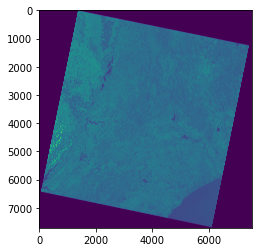

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(imstack1)


In [ ]:
import numpy as np
import rasterio as rio
import tifffile as tiff
from patchify import patchify
from rasterio.plot import show

In [ ]:
IMG_PATH = '1.TIF'
OUT_PATH = 'Folder/'

In [ ]:
imge = rio.open('1.TIF')
img_array = imge.read()
print(img_array.shape)

(1, 7711, 7551)


In [ ]:
img_array = np.moveaxis(img_array, 0, 2) # move bands to the last dimension of the array
print(img_array.shape)

(7711, 7551, 1)


In [ ]:
PATCH_SIZE = 256
PATCH_STEP = 256
patches = patchify(img_array,(PATCH_SIZE, PATCH_SIZE,1), step=PATCH_STEP)
print(patches.shape)

(30, 29, 1, 256, 256, 1)


In [ ]:
for x in range(patches.shape[0]):
    for y in range(patches.shape[1]):
            single_patch = patches[x,y,:,:,:]
            tiff.imwrite(OUT_PATH + 'Image_' + str(x) + '_' + str(y) + ".tiff", single_patch)